In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
ela_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_ela_2019.csv')
ela_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_ela_2022.csv')

sci_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_science_2019.csv')
sci_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_science_2022.csv')

math_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_math_2019.csv')
math_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_math_2022.csv')

# take 3.2s to run

/tmp/ipykernel_2292/1432468013.py:1: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ela_pre = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_ela_2019.csv')
/tmp/ipykernel_2292/1432468013.py:5: DtypeWarning: Columns (11,12,13,15,19,21,22,24,28,30,31,33,37,39,40,42,46,48,49,51,55,57,58,60,64,66,67,69,73,75,76,78,82,84,85,87,91,93,94,96,100,102,103,105,109,111,112,114,118,120,121,123,127,129) have mixed types. Specify dtype option on import or set low_memory=False.
  sci_post = pd.read_csv('/workspaces/unifying-data-science-2023-project-grupo9/Data_clean_merge/df_science_2022.csv')
/tmp/ipykernel_2292/1432468013.py:8: DtypeWarning: Columns (11,12,13,15,19,21,22,24,28,30,31,33,37,39,40,42,46,48,49,51,55,57,58,60,64,66,67,69,73,75,76,78,82,84,85,87,91,93,94,96,100,102,103,105,109,111,112,114,118,120,121,123,127,129) have mixed types. Specify dtype option on import or set low_memory=False.
  

In [23]:
ela_pre.isnull().sum()

ENTITY_CD                                           0
ENTITY_NAME                                         0
YEAR                                                0
ASSESSMENT_NAME                                     0
NOT_TESTED                                          0
                                                 ... 
Students with Disabilities_NOT_TESTED            9636
Students with Disabilities_NUM_PROF              9636
Students with Disabilities_NUM_TESTED            9636
Students with Disabilities_PER_PROF              9636
Students with Disabilities_TOTAL_SCALE_SCORES    9636
Length: 88, dtype: int64

In [24]:
ela_pre.columns

Index(['ENTITY_CD', 'ENTITY_NAME', 'YEAR', 'ASSESSMENT_NAME', 'NOT_TESTED',
       'NUM_TESTED', 'NUM_PROF', 'PER_PROF', 'TOTAL_SCALE_SCORES',
       'MEAN_SCORE', 'Female_MEAN_SCORE', 'Female_NOT_TESTED',
       'Female_NUM_PROF', 'Female_NUM_TESTED', 'Female_PER_PROF',
       'Female_TOTAL_SCALE_SCORES', 'Male_MEAN_SCORE', 'Male_NOT_TESTED',
       'Male_NUM_PROF', 'Male_NUM_TESTED', 'Male_PER_PROF',
       'Male_TOTAL_SCALE_SCORES',
       'American Indian or Alaska Native_MEAN_SCORE',
       'American Indian or Alaska Native_NOT_TESTED',
       'American Indian or Alaska Native_NUM_PROF',
       'American Indian or Alaska Native_NUM_TESTED',
       'American Indian or Alaska Native_PER_PROF',
       'American Indian or Alaska Native_TOTAL_SCALE_SCORES',
       'Asian or Native Hawaiian/Other Pacific Islander_MEAN_SCORE',
       'Asian or Native Hawaiian/Other Pacific Islander_NOT_TESTED',
       'Asian or Native Hawaiian/Other Pacific Islander_NUM_PROF',
       'Asian or Native Haw

In [25]:
lst_col = [
    "ENTITY_CD",
    "Female_MEAN_SCORE",
    "Male_MEAN_SCORE",
    "MEAN_SCORE",
    "YEAR"
]

ela_pre = ela_pre[lst_col]
ela_post = ela_post[lst_col]

sci_pre = sci_pre[lst_col]
sci_post = sci_post[lst_col]

math_pre = math_pre[lst_col]
math_post = math_post[lst_col]


In [27]:
ela_pre['Type'] = 'ela_pre'
ela_post['Type'] = 'ela_post'

sci_pre['Type'] = 'sci_pre'
sci_post['Type'] = 'sci_post'

math_pre['Type'] = 'math_pre'
math_post['Type'] = 'math_post'


In [28]:
ela_pre

,ENTITY_CD,Female_MEAN_SCORE,Male_MEAN_SCORE,MEAN_SCORE,YEAR,Type
0,1,604,598,601,2018,ela_pre
1,1,NaN,NaN,00,2018,ela_pre
2,1,603,598,600,2018,ela_pre
3,1,605,598,602,2018,ela_pre
4,1,605,598,602,2018,ela_pre
...,...,...,...,...,...,...
41550,680801040002,593,594,594,2019,ela_pre
41551,680801040002,598,599,599,2019,ela_pre
41552,680801040002,598,595,596,2019,ela_pre
41553,680801040002,597,586,591,2019,ela_pre


In [29]:
# combine all the dataframes into one

df = pd.concat([ela_pre, ela_post, sci_pre, sci_post, math_pre, math_post], ignore_index=True)
df

,ENTITY_CD,Female_MEAN_SCORE,Male_MEAN_SCORE,MEAN_SCORE,YEAR,Type
0,1,604,598,601,2018,ela_pre
1,1,NaN,NaN,00,2018,ela_pre
2,1,603,598,600,2018,ela_pre
3,1,605,598,602,2018,ela_pre
4,1,605,598,602,2018,ela_pre
...,...,...,...,...,...,...
248240,680801040002,NaN,NaN,NaN,2022,math_post
248241,680801040002,590,582,585,2022,math_post
248242,680801040002,NaN,NaN,NaN,2022,math_post
248243,680801040002,589,601,595,2022,math_post


In [31]:

df.groupby('Type')['ENTITY_CD'].nunique()

Type
ela_post     4601
ela_pre      4417
math_post    4604
math_pre     4419
sci_post     4476
sci_pre      4295
Name: ENTITY_CD, dtype: int64

<Axes: xlabel='Type'>

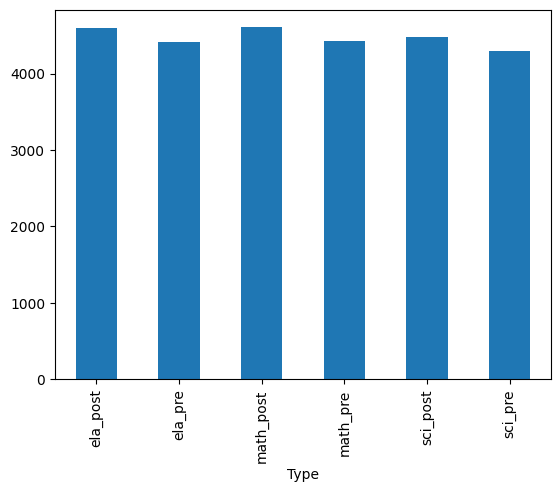

In [32]:

df.groupby('Type')['ENTITY_CD'].nunique().plot(kind='bar')
